In [161]:
from prophet import Prophet

In [259]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/sih/ngstock.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/24/2022,9.330,45843.0,9.250,9.455,9.100
1,08/23/2022,9.193,113514.0,9.817,10.028,9.050
2,08/22/2022,9.680,88110.0,9.174,9.982,9.158
3,08/19/2022,9.336,65254.0,9.201,9.395,8.870
4,08/18/2022,9.188,103549.0,9.166,9.663,8.913


In [260]:
df.columns=['Date','Close','Volume','Open','High','Low']

In [261]:
df = df[["Date","Close"]] 

In [262]:
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
df.head()

,ds,y
0,08/24/2022,9.330
1,08/23/2022,9.193
2,08/22/2022,9.680
3,08/19/2022,9.336
4,08/18/2022,9.188


In [289]:
df['ds']=pd.to_datetime(df['ds'])

In [290]:
df=df.sort_values(by='ds')

In [292]:
df

,ds,y
2547,2012-08-27,2.653
2546,2012-08-28,2.614
2545,2012-08-29,2.634
2544,2012-08-30,2.748
2543,2012-08-31,2.799
...,...,...
4,2022-08-18,9.188
3,2022-08-19,9.336
2,2022-08-22,9.680
1,2022-08-23,9.193


In [299]:
new=df['y']

In [301]:
new.set_index(df['ds'])

AttributeError: ignored

In [291]:
from prophet import Prophet
# The Prophet class (model)
fbp = Prophet(weekly_seasonality =True ,seasonality_prior_scale=1.0,seasonality_mode='additive',changepoint_prior_scale=5) 

fbp.fit(df)
# We need to specify the number of days in future
# We'll be predicting the full 2021 stock prices
fut = fbp.make_future_dataframe(periods=1365) 

forecast = fbp.predict(fut)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-08-25 17:42:52.261 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83vhloes/0vsv70kt.json
2022-08-25 17:42:52.297 input tempfile: /tmp/tmp83vhloes/0vsv70kt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83vhloes/07ar5ogj.json
2022-08-25 17:42:52.346 input tempfile: /tmp/tmp83vhloes/07ar5ogj.json
DEBUG:cmdstanpy:idx 0
2022-08-25 17:42:52.352 idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
2022-08-25 17:42:52.358 running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6620', 'data', 'file=/tmp/tmp83vhloes/0vsv70kt.json', 'init=/tmp/tmp83vhloes/07ar5ogj.json', 'output', 'file=/tmp/tmp_ipwb5ik/prophet_model-20220825174252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
2022-08-25 17:42:52.

In [293]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2012-08-27,2.831032,2.309678,3.366744
1,2012-08-28,2.849457,2.294397,3.368494
2,2012-08-29,2.873121,2.344206,3.370265
3,2012-08-30,2.876901,2.373336,3.429624
4,2012-08-31,2.878258,2.348673,3.421834


In [294]:
forecast.to_csv('/content/sample_data/fBP-Forecast(2021-26).csv')

In [295]:
from prophet.plot import plot_plotly, plot_components_plotly
# A better plot than the simple matplotlib
plot_plotly(fbp, forecast)

In [302]:
df=df.sort_values(by='ds')

In [303]:

actual_forecasted = forecast.set_index(['ds'])[['yhat']].join(df.set_index('ds')).dropna()
actual_forecasted.reset_index(inplace=True)
actual_forecasted['ds'] = actual_forecasted.ds.astype(str)
actual_forecasted.set_index(['ds'],inplace=True)

actual_forecasted.columns=['predicted','actual']

actual_forecasted.head()

,predicted,actual
ds,,
2012-08-27,2.831032,2.653
2012-08-28,2.849457,2.614
2012-08-29,2.873121,2.634
2012-08-30,2.876901,2.748
2012-08-31,2.878258,2.799


Text(0.5, 1.0, 'Actual vs Forecasted values')

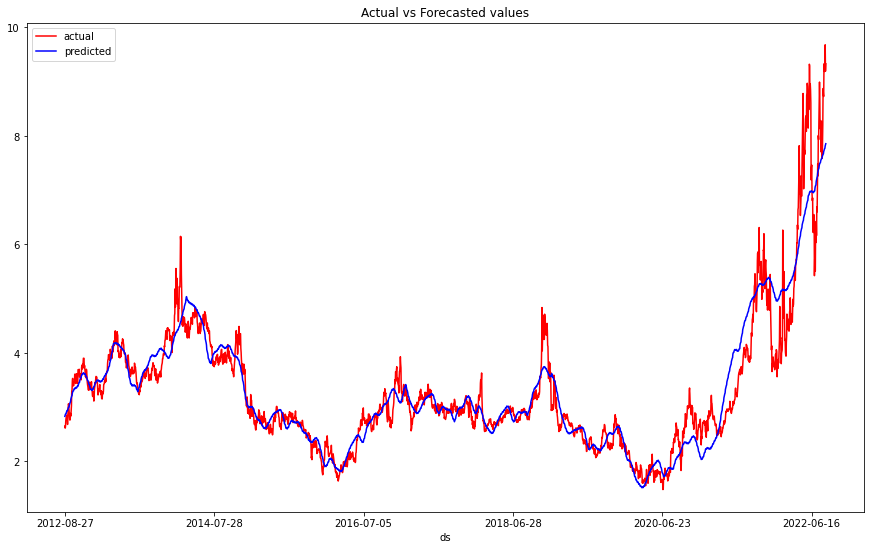

In [304]:
# Visualizing actual temperatures vs forecasted temperature

plt.figure(figsize=(15,9))
actual_forecasted['actual'].plot(color='red')
actual_forecasted['predicted'].plot(color='blue')
plt.legend(loc='best')
plt.title('Actual vs Forecasted values')

In [305]:

actual_forecasted['residual'] = actual_forecasted['actual'] - actual_forecasted['predicted']
actual_forecasted.describe().T

,count,mean,std,min,25%,50%,75%,max
predicted,2548.0,3.304004,1.157039,1.516118,2.528385,2.996852,3.910957,7.856873
actual,2548.0,3.304145,1.229791,1.482000,2.625750,2.950500,3.769500,9.680000
residual,2548.0,0.000141,0.410937,-1.576702,-0.175807,-0.015012,0.157904,2.375623


In [313]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

In [314]:
print('mean squared error : ' , mean_squared_error(actual_forecasted['actual'], actual_forecasted['predicted']))
print('root mean squared error : ' , sqrt(mean_squared_error(actual_forecasted['actual'], actual_forecasted['predicted'])))

print('mean absolute error : ' , mean_absolute_error(actual_forecasted['actual'], actual_forecasted['predicted']))

mean squared error :  0.16880308920518758
root mean squared error :  0.4108565311701733
mean absolute error :  0.27033410993590207
